## Rent Prediction Insights in Dubai

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("dubai_properties.csv")
df.dropna(inplace=True)
df.columns
df

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73729,"Al Salamah, Umm Al Quwain",10000,0,1,Apartment,249,40.160643,Low,Yearly,Unfurnished,For Rent,2023-12-09,134,Al Salamah,Umm Al Quwain,25.493412,55.575994
73734,"Al Ramlah, Umm Al Quwain",25000,1,1,Villa,500,50.000000,Low,Yearly,Unfurnished,For Rent,2023-12-01,142,Al Ramlah,Umm Al Quwain,25.511461,55.578804
73735,"Umm Al Quwain Marina, Umm Al Quwain",22000,2,2,Apartment,1000,22.000000,Low,Yearly,Unfurnished,For Rent,2024-03-26,26,Umm Al Quwain Marina,Umm Al Quwain,25.527959,55.606527
73737,"Al Huboob 1, Al Salamah, Umm Al Quwain",14000,0,1,Apartment,419,33.412888,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Al Salamah,Umm Al Quwain,25.493412,55.575994


In [3]:
# 按房产类型划分的平均租金价格
average_rent_by_type = df.groupby('Type')['Rent'].mean()
print(average_rent_by_type)
print("////////////////////////////////////////////////////////////////////////////")
# 比较带家具和不带家具的房产的平均租金
average_rent_by_furnishing = df.groupby('Furnishing')['Rent'].mean()
print(average_rent_by_furnishing)

Type
Apartment               1.100011e+05
Hotel Apartment         2.267081e+05
Penthouse               4.870754e+05
Residential Building    2.866282e+06
Residential Floor       1.409327e+06
Residential Plot        2.996498e+05
Townhouse               1.916066e+05
Villa                   2.870596e+05
Villa Compound          1.799667e+05
Name: Rent, dtype: float64
////////////////////////////////////////////////////////////////////////////
Furnishing
Furnished      205998.104373
Unfurnished    132695.521775
Name: Rent, dtype: float64


In [4]:
# 统计空数据
df.isnull().sum()

Address                   0
Rent                      0
Beds                      0
Baths                     0
Type                      0
Area_in_sqft              0
Rent_per_sqft             0
Rent_category             0
Frequency                 0
Furnishing                0
Purpose                   0
Posted_date               0
Age_of_listing_in_days    0
Location                  0
City                      0
Latitude                  0
Longitude                 0
dtype: int64

In [5]:
# 基本内容统计
df.describe()

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude
count,7.302300e+04,73023.000000,73023.000000,73023.000000,73023.000000,73023.000000,73023.000000,73023.000000
mean,1.483723e+05,2.154458,2.638771,2035.634471,88.537296,73.884735,24.918929,55.053133
std,3.082652e+05,1.571260,1.620881,2976.159891,66.627532,71.837749,0.569356,0.653722
min,0.000000e+00,0.000000,1.000000,74.000000,0.000000,11.000000,15.175847,43.351928
25%,5.499900e+04,1.000000,2.000000,850.000000,40.000000,30.000000,24.493598,54.607372
50%,9.800000e+04,2.000000,2.000000,1329.000000,71.813285,51.000000,25.078641,55.238209
75%,1.700000e+05,3.000000,3.000000,2101.000000,119.047619,95.000000,25.197978,55.367138
max,5.500000e+07,12.000000,11.000000,210254.000000,2182.044888,2276.000000,25.920310,56.361294


In [6]:
# 检查分类列中的唯一值
print(df['Type'].value_counts())
print(df['Rent_category'].value_counts())
print(df['Furnishing'].value_counts())
print(df['Purpose'].value_counts())
print(df['Frequency'].value_counts())

Type
Apartment               56153
Villa                   12559
Townhouse                3417
Hotel Apartment           461
Penthouse                 266
Villa Compound            105
Residential Building       44
Residential Floor          12
Residential Plot            6
Name: count, dtype: int64
Rent_category
Medium    24838
High      24244
Low       23941
Name: count, dtype: int64
Furnishing
Unfurnished    57406
Furnished      15617
Name: count, dtype: int64
Purpose
For Rent    73023
Name: count, dtype: int64
Frequency
Yearly    73023
Name: count, dtype: int64


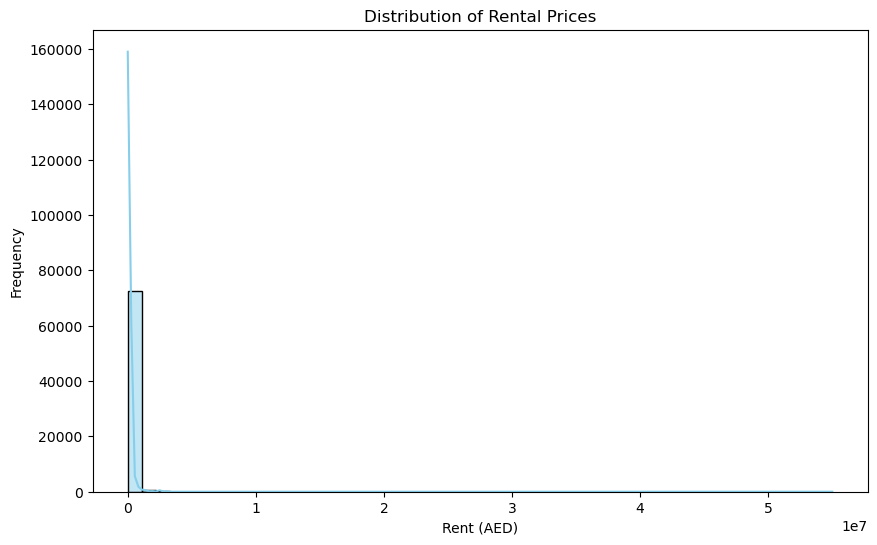

In [7]:
# 租金分布
plt.figure(figsize=(10,6))
sns.histplot(df['Rent'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Rental Prices') # 租金价格分布
plt.xlabel('Rent (AED)') # 核密度
plt.ylabel('Frequency') # 阿迪尔
plt.show()

C:\Users\13050\AppData\Local\Temp\ipykernel_15312\594346864.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Beds', y='Rent', data=df, palette='Set3')


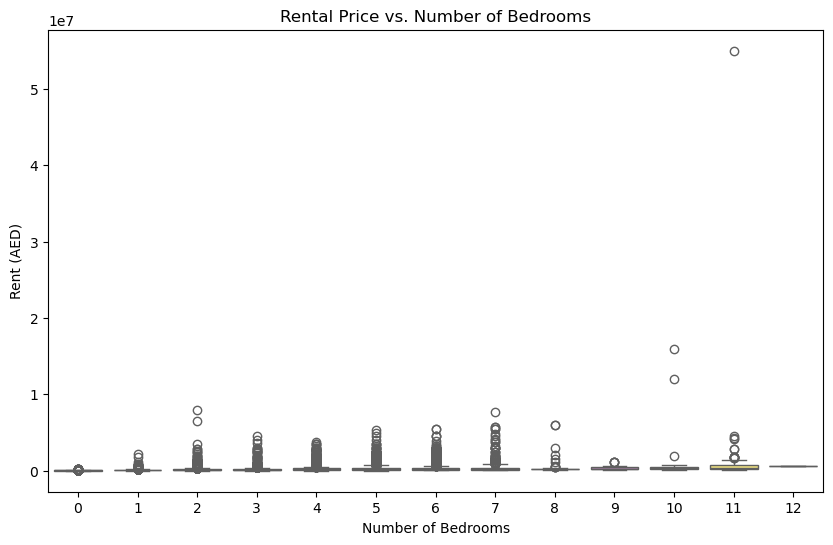

In [8]:
# 租金与卧室数量的对比
plt.figure(figsize=(10,6))
sns.boxplot(x='Beds', y='Rent', data=df, palette='Set3')
plt.title('Rental Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent (AED)')
plt.show()

C:\Users\13050\AppData\Local\Temp\ipykernel_15312\1331083053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Rent_category', data=df, palette='viridis')


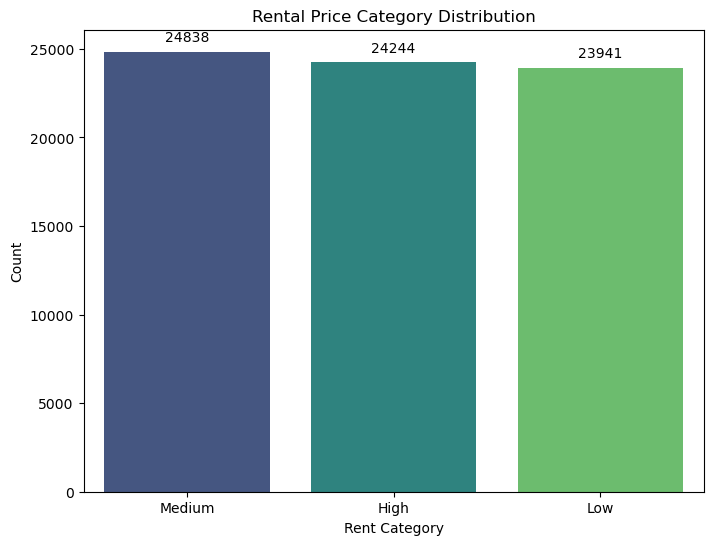

In [9]:
# 租金价格类别分布
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Rent_category', data=df, palette='viridis')
plt.title('Rental Price Category Distribution')
plt.xlabel('Rent Category')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')

plt.show()

C:\Users\13050\AppData\Local\Temp\ipykernel_15312\3229393951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Type', data=df, palette='muted')


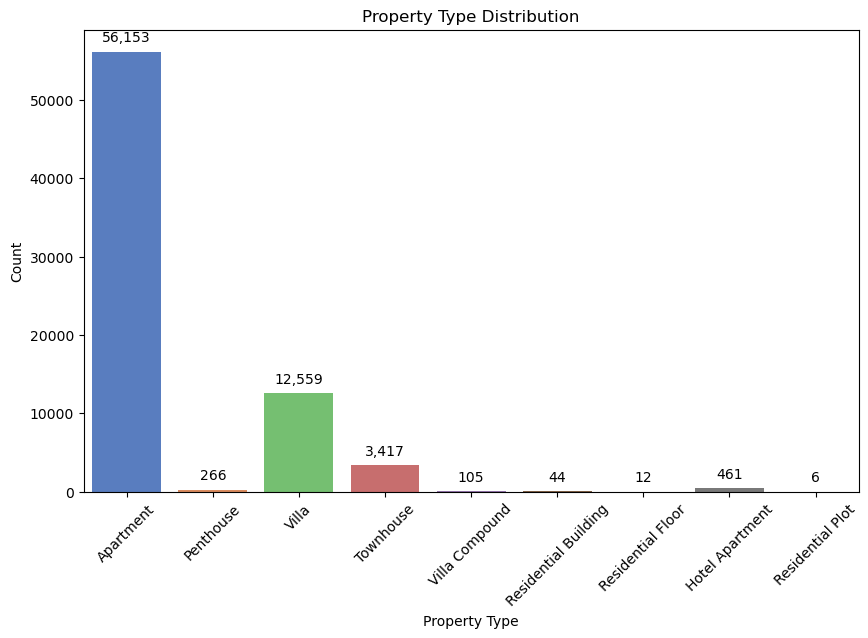

In [10]:
# 物业类型分布
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Type', data=df, palette='muted')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Property Type Distribution')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

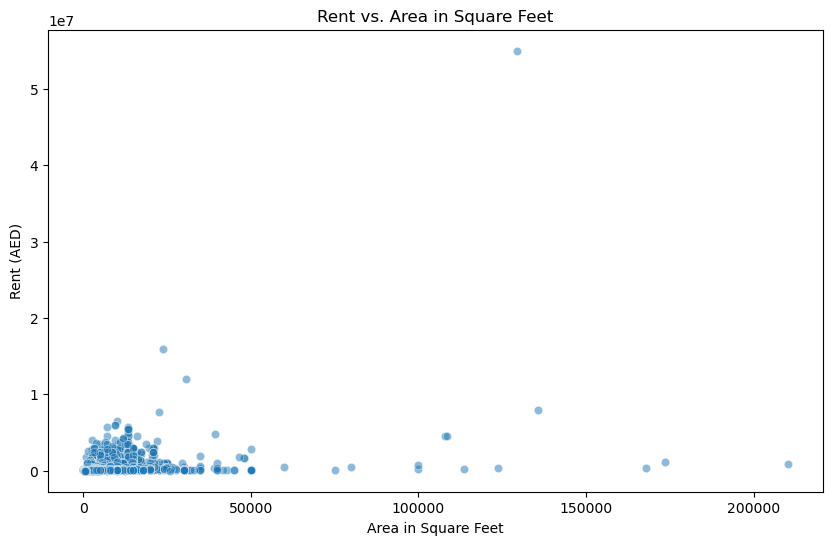

In [11]:
# 租金与面积(平方英尺)的关系
plt.figure(figsize=(10,6))
sns.scatterplot(x='Area_in_sqft', y='Rent', data=df, alpha=0.5)
plt.title('Rent vs. Area in Square Feet')
plt.xlabel('Area in Square Feet')
plt.ylabel('Rent (AED)')
plt.show()

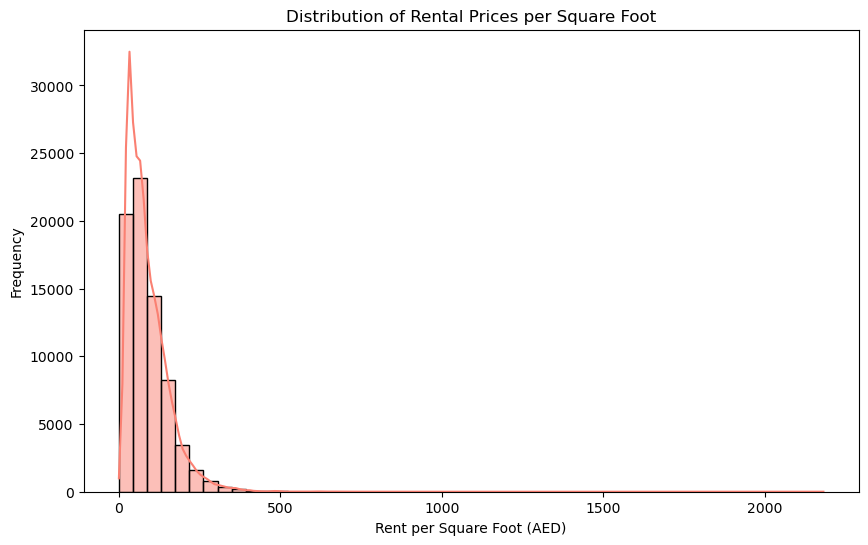

In [12]:
# 每平方英尺租金分布
plt.figure(figsize=(10,6))
sns.histplot(df['Rent_per_sqft'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Rental Prices per Square Foot')
plt.xlabel('Rent per Square Foot (AED)')
plt.ylabel('Frequency')
plt.show()

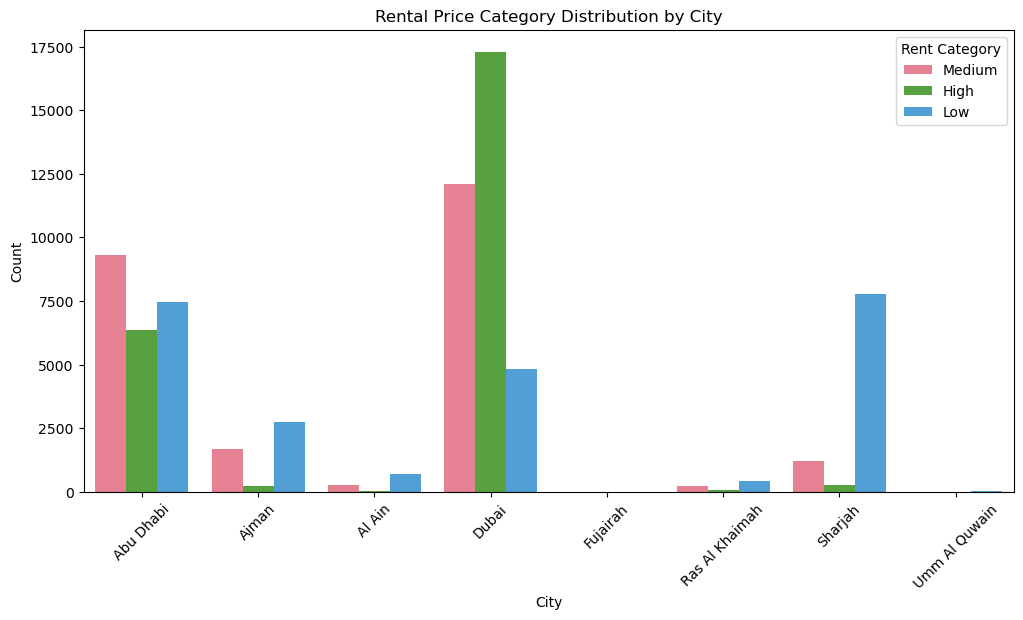

In [13]:
# 按城市划分的租金价格类别分布
plt.figure(figsize=(12,6))
sns.countplot(x='City', hue='Rent_category', data=df, palette='husl')
plt.title('Rental Price Category Distribution by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Rent Category')
plt.xticks(rotation=45)
plt.show()

C:\Users\13050\AppData\Local\Temp\ipykernel_15312\492296889.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Furnishing', data=df, palette='pastel')


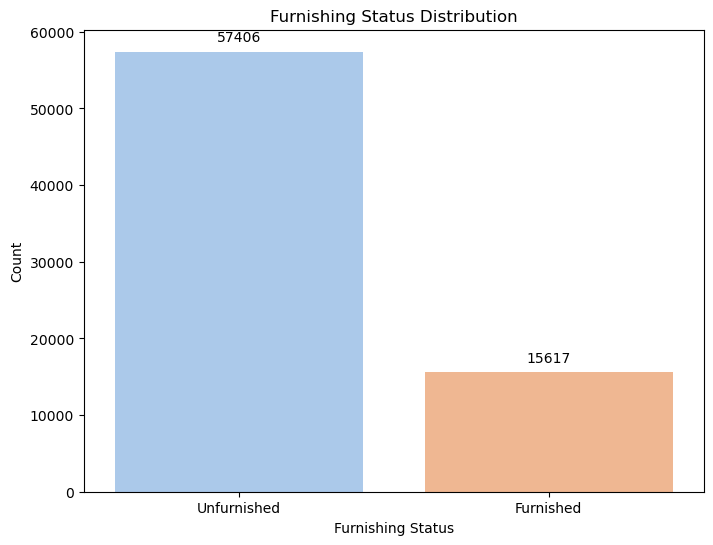

In [14]:
# 是否装修划分
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Furnishing', data=df, palette='pastel')
plt.title('Furnishing Status Distribution')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

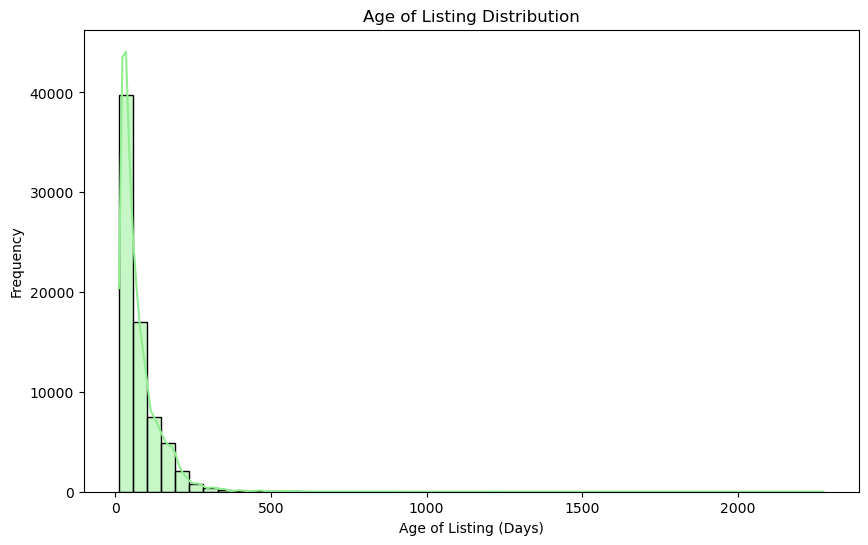

In [15]:
# 上市发行年龄
plt.figure(figsize=(10,6))
sns.histplot(df['Age_of_listing_in_days'], bins=50, kde=True, color='lightgreen')
plt.title('Age of Listing Distribution')
plt.xlabel('Age of Listing (Days)')
plt.ylabel('Frequency')
plt.show()

C:\Users\13050\AppData\Local\Temp\ipykernel_15312\1401688140.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Rent', data=df, palette='Set2')


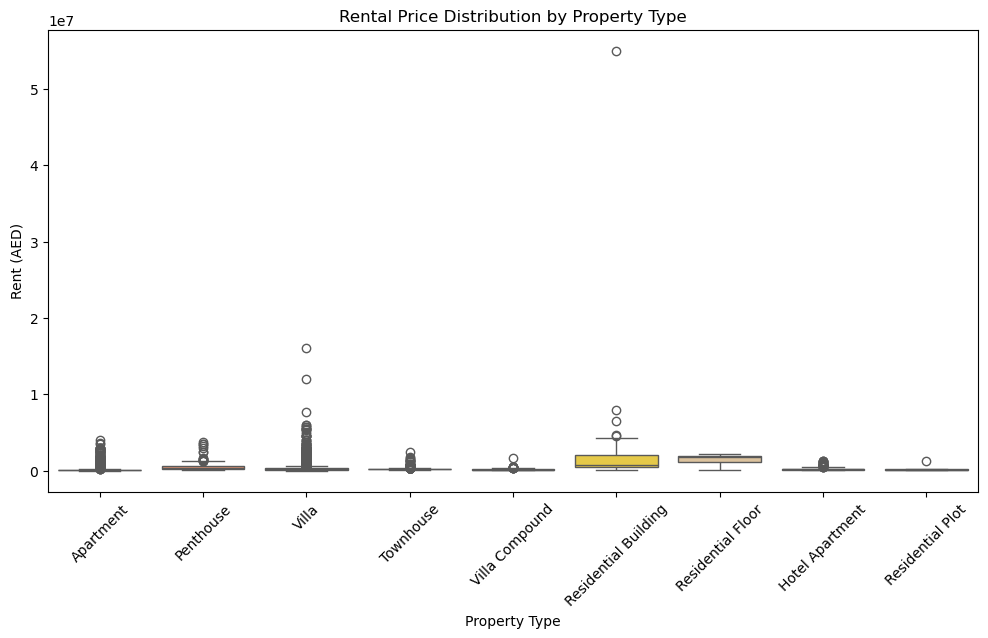

In [16]:
# 按物业类型划分的租金分布
plt.figure(figsize=(12,6))
sns.boxplot(x='Type', y='Rent', data=df, palette='Set2')
plt.title('Rental Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Rent (AED)')
plt.xticks(rotation=45)
plt.show()

C:\Users\13050\AppData\Local\Temp\ipykernel_15312\427135850.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Baths', y='Rent', data=df, palette='muted')


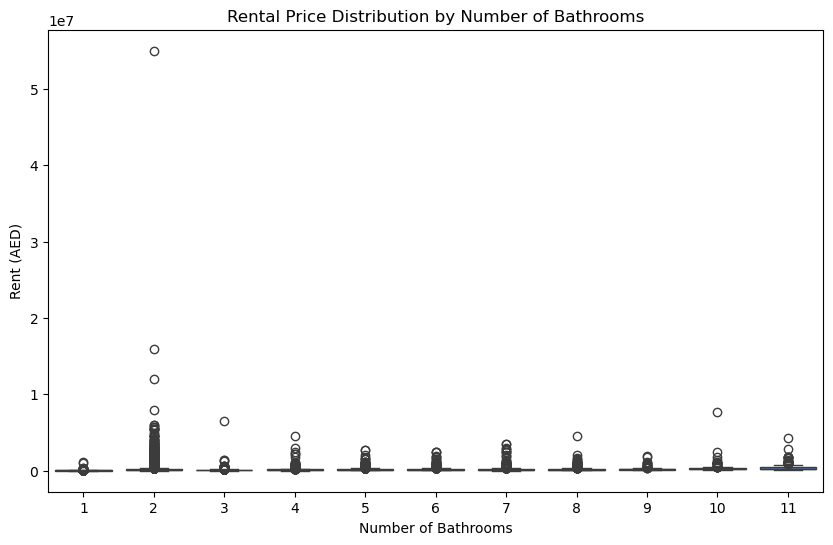

In [17]:
# 按浴室数量划分的租金价格分布
plt.figure(figsize=(10,6))
sns.boxplot(x='Baths', y='Rent', data=df, palette='muted')
plt.title('Rental Price Distribution by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Rent (AED)')
plt.show()

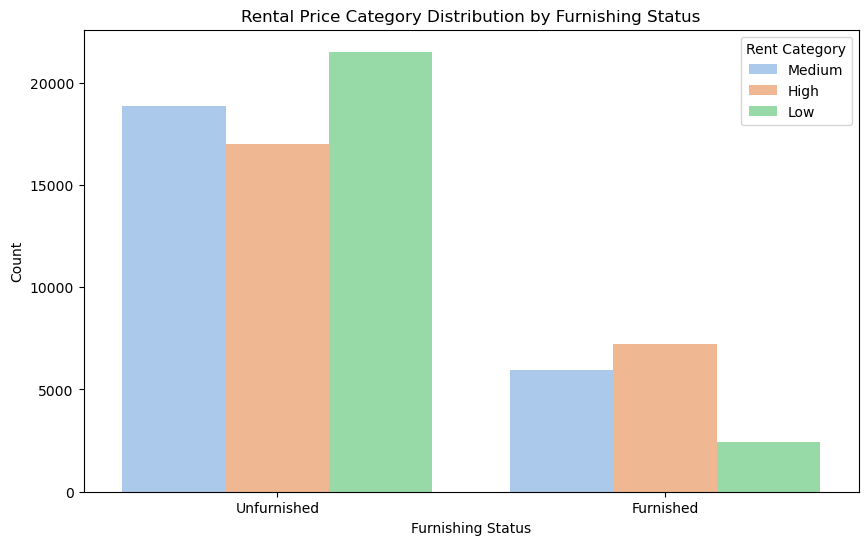

In [18]:
# 按装修状态划分的租金价格类别分布
plt.figure(figsize=(10,6))
sns.countplot(x='Furnishing', hue='Rent_category', data=df, palette='pastel')
plt.title('Rental Price Category Distribution by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.legend(title='Rent Category')
plt.show()

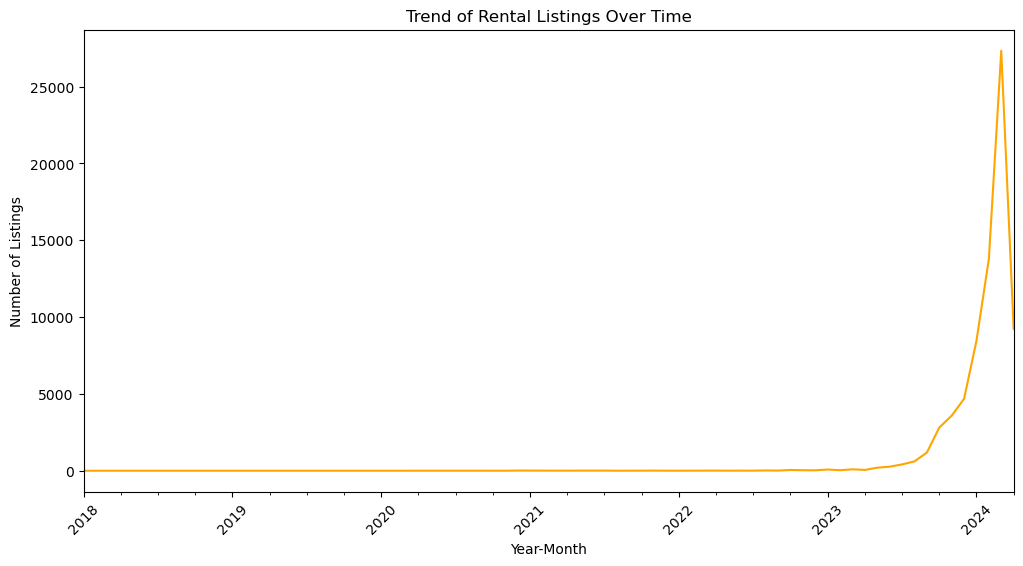

In [19]:
# Trend of Rental Listings Over Time
df['Posted_date'] = pd.to_datetime(df['Posted_date'])
df['Year_month'] = df['Posted_date'].dt.to_period('M')

plt.figure(figsize=(12,6))
df.groupby('Year_month').size().plot(color='orange')
plt.title('Trend of Rental Listings Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

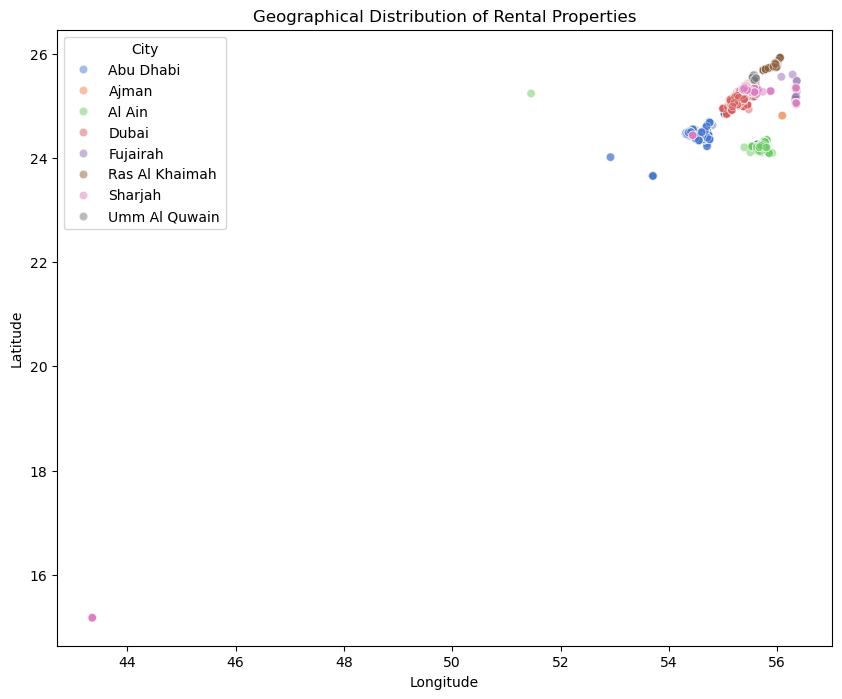

In [20]:
# 出租物业的地理分布
plt.figure(figsize=(10,8))
sns.scatterplot(x='Longitude', y='Latitude', hue='City', data=df, palette='muted', alpha=0.5)
plt.title('Geographical Distribution of Rental Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='City')
plt.show()

C:\Users\13050\AppData\Local\Temp\ipykernel_15312\1324758560.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='Rent', data=df, palette='Set3')


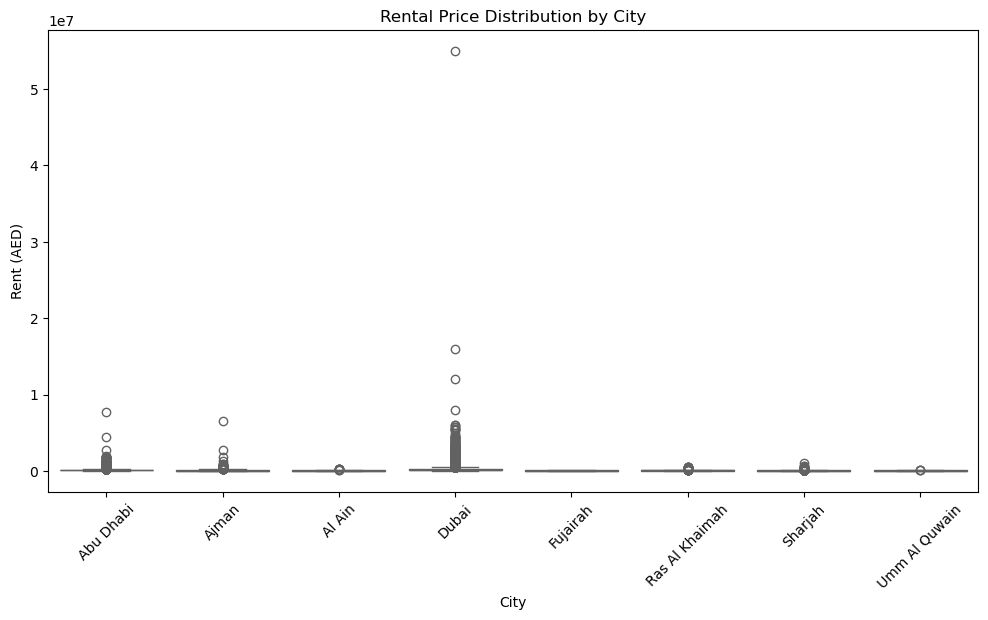

In [21]:
# 按城市划分的租金分布
plt.figure(figsize=(12,6))
sns.boxplot(x='City', y='Rent', data=df, palette='Set3')
plt.title('Rental Price Distribution by City')
plt.xlabel('City')
plt.ylabel('Rent (AED)')
plt.xticks(rotation=45)
plt.show()

C:\Users\13050\AppData\Local\Temp\ipykernel_15312\635213062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Purpose', y='Rent', data=df, palette='pastel')


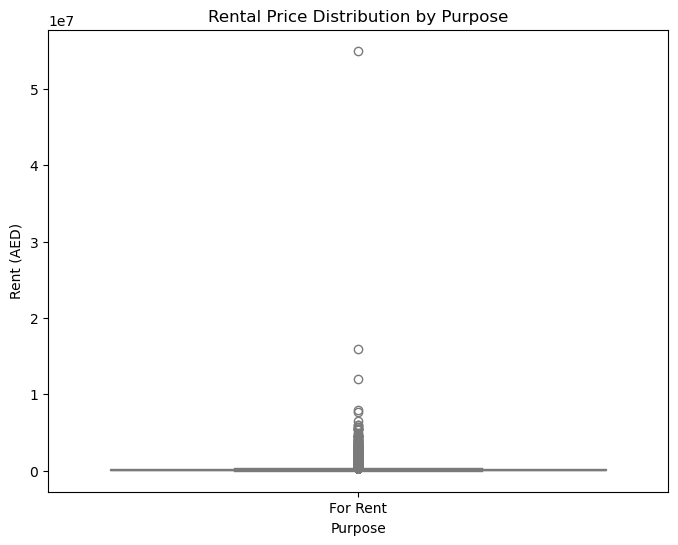

In [22]:
# 按用途划分的租金分布(出租/出售)
plt.figure(figsize=(8,6))
sns.boxplot(x='Purpose', y='Rent', data=df, palette='pastel')
plt.title('Rental Price Distribution by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Rent (AED)')
plt.show()

C:\Users\13050\AppData\Local\Temp\ipykernel_15312\671500340.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='Age_of_listing_in_days', data=df, palette='viridis')


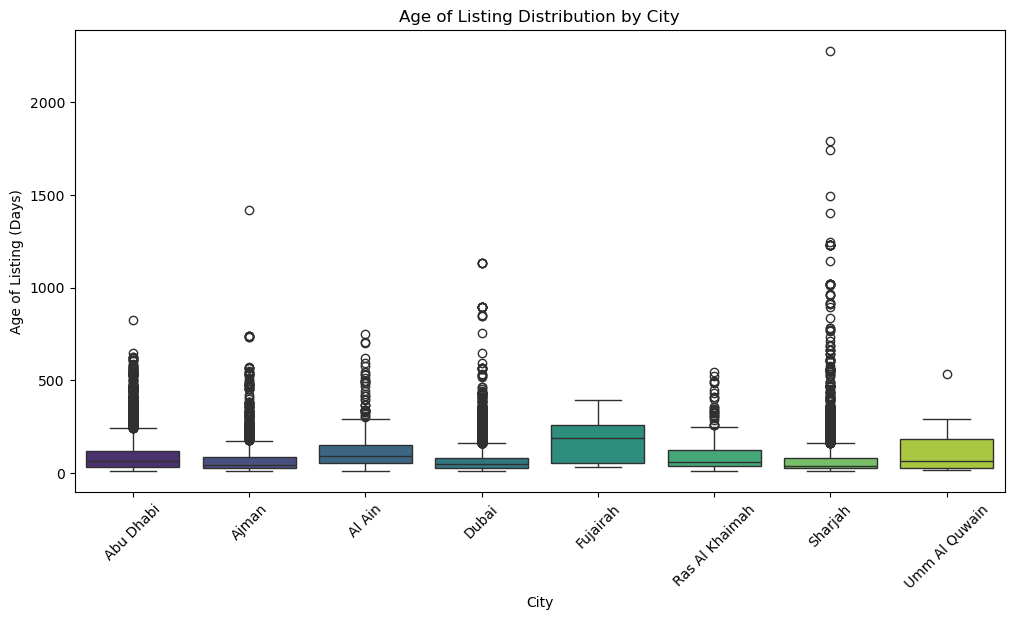

In [23]:
# 按城市划分的上市分配年龄
plt.figure(figsize=(12,6))
sns.boxplot(x='City', y='Age_of_listing_in_days', data=df, palette='viridis')
plt.title('Age of Listing Distribution by City')
plt.xlabel('City')
plt.ylabel('Age of Listing (Days)')
plt.xticks(rotation=45)
plt.show()

C:\Users\13050\AppData\Local\Temp\ipykernel_15312\3046274499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Beds', y='Rent', data=df, palette='muted')


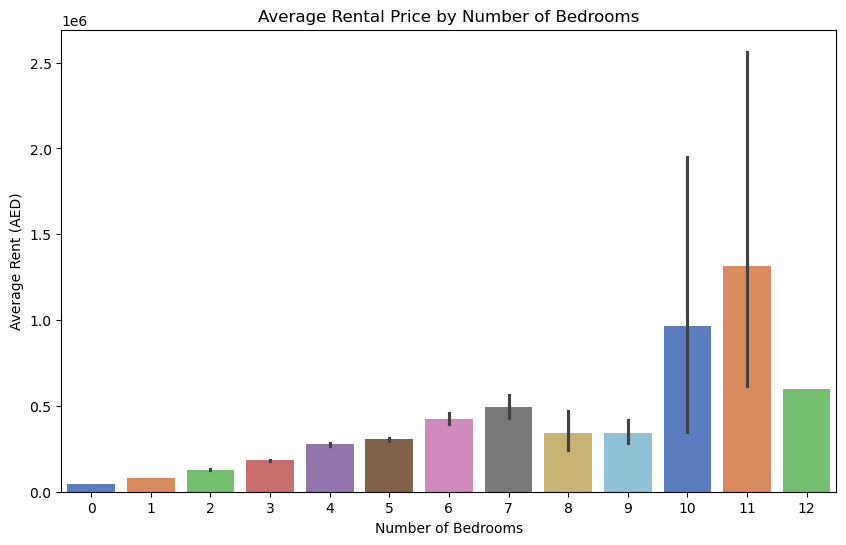

In [24]:
# 按卧室数量划分的平均租金
plt.figure(figsize=(10,6))
sns.barplot(x='Beds', y='Rent', data=df, palette='muted')
plt.title('Average Rental Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Rent (AED)')
plt.show()

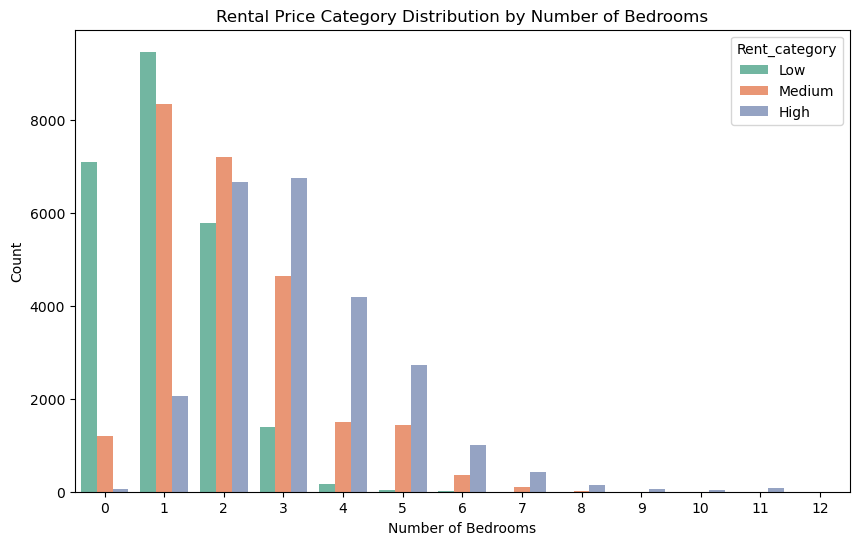

In [25]:
# 按卧室数量划分的租金价格类别分布
plt.figure(figsize=(10,6))
sns.countplot(x='Beds', hue='Rent_category', data=df, palette='Set2')
plt.title('Rental Price Category Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()